# Using Classification Model for Prediction

## Load Tensorflow

In [0]:
import tensorflow as tf

In [2]:
from google.colab import files
files.upload()

Saving mnist_dnn_v1.h5 to mnist_dnn_v1.h5


{'mnist_dnn_v1.h5': b'\x89HDF\r\n\x1a\n\x00\x00\x00\x00\x00\x08\x08\x00\x04\x00\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x98\xf1\x0b\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00`\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x88\x00\x00\x00\x00\x00\x00\x00\xa8\x02\x00\x00\x00\x00\x00\x00\x01\x00\x07\x00\x01\x00\x00\x00\x18\x00\x00\x00\x00\x00\x00\x00\x10\x00\x10\x00\x00\x00\x00\x00 \x03\x00\x00\x00\x00\x00\x00h\x01\x00\x00\x00\x00\x00\x00TREE\x00\x00\x01\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [3]:
!ls -l

total 772
-rw-r--r-- 1 root root 782744 Apr  9 17:26 mnist_dnn_v1.h5
drwxr-xr-x 1 root root   4096 Apr  3 16:24 sample_data


# Load Model

In [4]:
model = tf.keras.models.load_model('mnist_dnn_v1.h5')

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                3

# Get some data

In [6]:
_,(testX,testY) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# Prediction

In [7]:
testX[0].shape

(28, 28)

In [8]:
model.input

<tf.Tensor 'reshape_input:0' shape=(None, 28, 28) dtype=float32>

In [0]:
import numpy as np

In [10]:
np.expand_dims(testX[0], axis=0).shape

(1, 28, 28)

In [11]:
#Actual label for the first example in test dataset
print(testY[0])

7


In [12]:
testX[0:1].shape

(1, 28, 28)

In [13]:
model.input

<tf.Tensor 'reshape_input:0' shape=(None, 28, 28) dtype=float32>

In [14]:
input_data = np.expand_dims(testX[0], axis=0)

#Model prediction
prediction = model.predict(input_data)

#Print prediction
print(prediction)

[[4.7809830e-05 1.0191208e-07 2.2557201e-07 4.5627985e-05 2.1269086e-07
  5.9677968e-06 8.9736873e-10 9.9938226e-01 2.2188114e-07 5.1753770e-04]]


In [15]:
prediction.shape

(1, 10)

# Prediction with Highest Probability

In [16]:
#Get predicted number with highest probability
predicted_num = np.argmax(prediction[0])

#Print the number
print(predicted_num)

7


# What is in the image

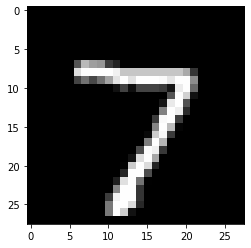

In [17]:
#Lets print the image as well
import matplotlib.pyplot as plt
plt.imshow(testX[0],cmap='gray')